In [4]:
import pandas as pd
import torch
import numpy as np
import pyntcloud
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
building_model = pyntcloud.PyntCloud.from_file("../results/south-building/model.ply")
city_model = pyntcloud.PyntCloud.from_file("../results/small_city_road_down_test/epochs_200_000/model.ply")

In [10]:
building_model.points.columns

Index(['x', 'y', 'z', 'a', 'q0', 'q1', 'q2', 'q3', 's0', 's1', 's2', 'sh0_x',
       'sh0_y', 'sh0_z', 'sh1_x', 'sh1_y', 'sh1_z', 'sh2_x', 'sh2_y', 'sh2_z',
       'sh3_x', 'sh3_y', 'sh3_z', 'sh4_x', 'sh4_y', 'sh4_z', 'sh5_x', 'sh5_y',
       'sh5_z', 'sh6_x', 'sh6_y', 'sh6_z', 'sh7_x', 'sh7_y', 'sh7_z', 'sh8_x',
       'sh8_y', 'sh8_z', 'sh9_x', 'sh9_y', 'sh9_z', 'sh10_x', 'sh10_y',
       'sh10_z', 'sh11_x', 'sh11_y', 'sh11_z', 'sh12_x', 'sh12_y', 'sh12_z',
       'sh13_x', 'sh13_y', 'sh13_z', 'sh14_x', 'sh14_y', 'sh14_z', 'sh15_x',
       'sh15_y', 'sh15_z'],
      dtype='object')

In [16]:
bm_scales = np.exp(np.concat([building_model.points['s0'], building_model.points['s1'], building_model.points['s2']]))

In [17]:
np.percentile(bm_scales, 90)

np.float32(0.0067151925)

(array([1620134.,  235214.,  142797.,  106153.,   86289.,   72873.,
          61429.,   50603.,   41426.,   33539.]),
 array([1.64806545e-06, 9.86867235e-04, 1.97208626e-03, 2.95730541e-03,
        3.94252455e-03, 4.92774369e-03, 5.91296284e-03, 6.89818198e-03,
        7.88340159e-03, 8.86862073e-03, 9.85383987e-03]),
 <BarContainer object of 10 artists>)

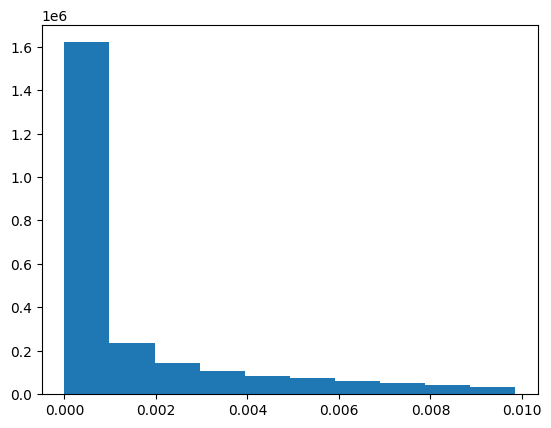

In [20]:
plt.hist(bm_scales[(bm_scales < np.percentile(bm_scales, 95)) & (bm_scales > np.percentile(bm_scales, 5))])

In [21]:
c_scales = np.exp(np.concat([city_model.points['s0'], city_model.points['s1'], city_model.points['s2']]))

Scales are large!

(array([47795., 16467.,  9378.,  6659.,  4675.,  3160.,  2238.,  1567.,
         1089.,   882.]),
 array([3.74446390e-05, 5.25123365e-02, 1.04987234e-01, 1.57462135e-01,
        2.09937021e-01, 2.62411892e-01, 3.14886808e-01, 3.67361695e-01,
        4.19836581e-01, 4.72311467e-01, 5.24786353e-01]),
 <BarContainer object of 10 artists>)

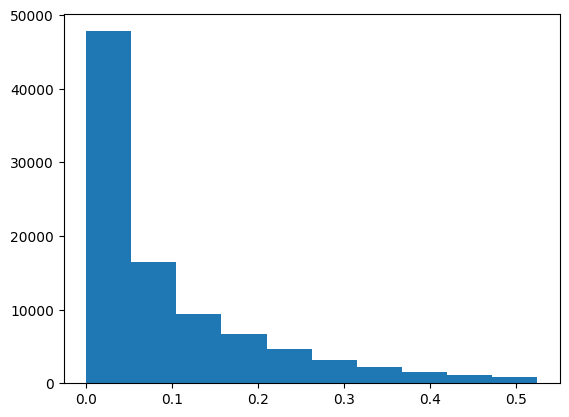

In [22]:
plt.hist(c_scales[(c_scales < np.percentile(c_scales, 95)) & (c_scales > np.percentile(c_scales, 5))])

In [24]:
len(building_model.points)

907577

There are too little splats probably

In [23]:
len(city_model.points)

34782